In [1]:
import soundfile as sf
import pygal
from pygal import Config
from pygal.style import Style

def makeChart(snd, fill=False, color="#000", bgcolor="transparent", numsamples=1000, skip=0):

  # Normalize the data
  snd = (snd / 2) + [0.5, 0.5]
  print(snd.min(), snd.max())

  config = Config()
  config.show_legend = False
  config.human_readable = False
  config.fill = fill
  config.show_y_guides = False
  config.show_x_guides = False
  config.show_dots = False
  config.range = (0, 1)
  config.xrange = (0, 1)

  background = bgcolor

  style = Style(
    background= background,
    plot_background= background,
    foreground= background,
    foreground_strong= background,
    foreground_subtle= background,
    opacity='.1',
    transition='0ms',
    colors=(color, color)
  )

  chart = pygal.XY(config, style=style)
  # Add the data points to the chart
  limit = (numsamples + skip) if numsamples > 0 else len(snd)
  chart.add('Lissajous', [(x[0], x[1]) for x in snd[skip:limit]], interpolate='cubic')
  return chart

def renderChart(chart, name):
  # path for svg file based on the input file
  svgpath = name + '.svg'
  pngpath = name + '.png'
  # Render the chart
  chart.render_to_file(svgpath, dpi=300, width=3000, height=3000)
  chart.render_to_png(pngpath, dpi=300, width=3000, height=3000)

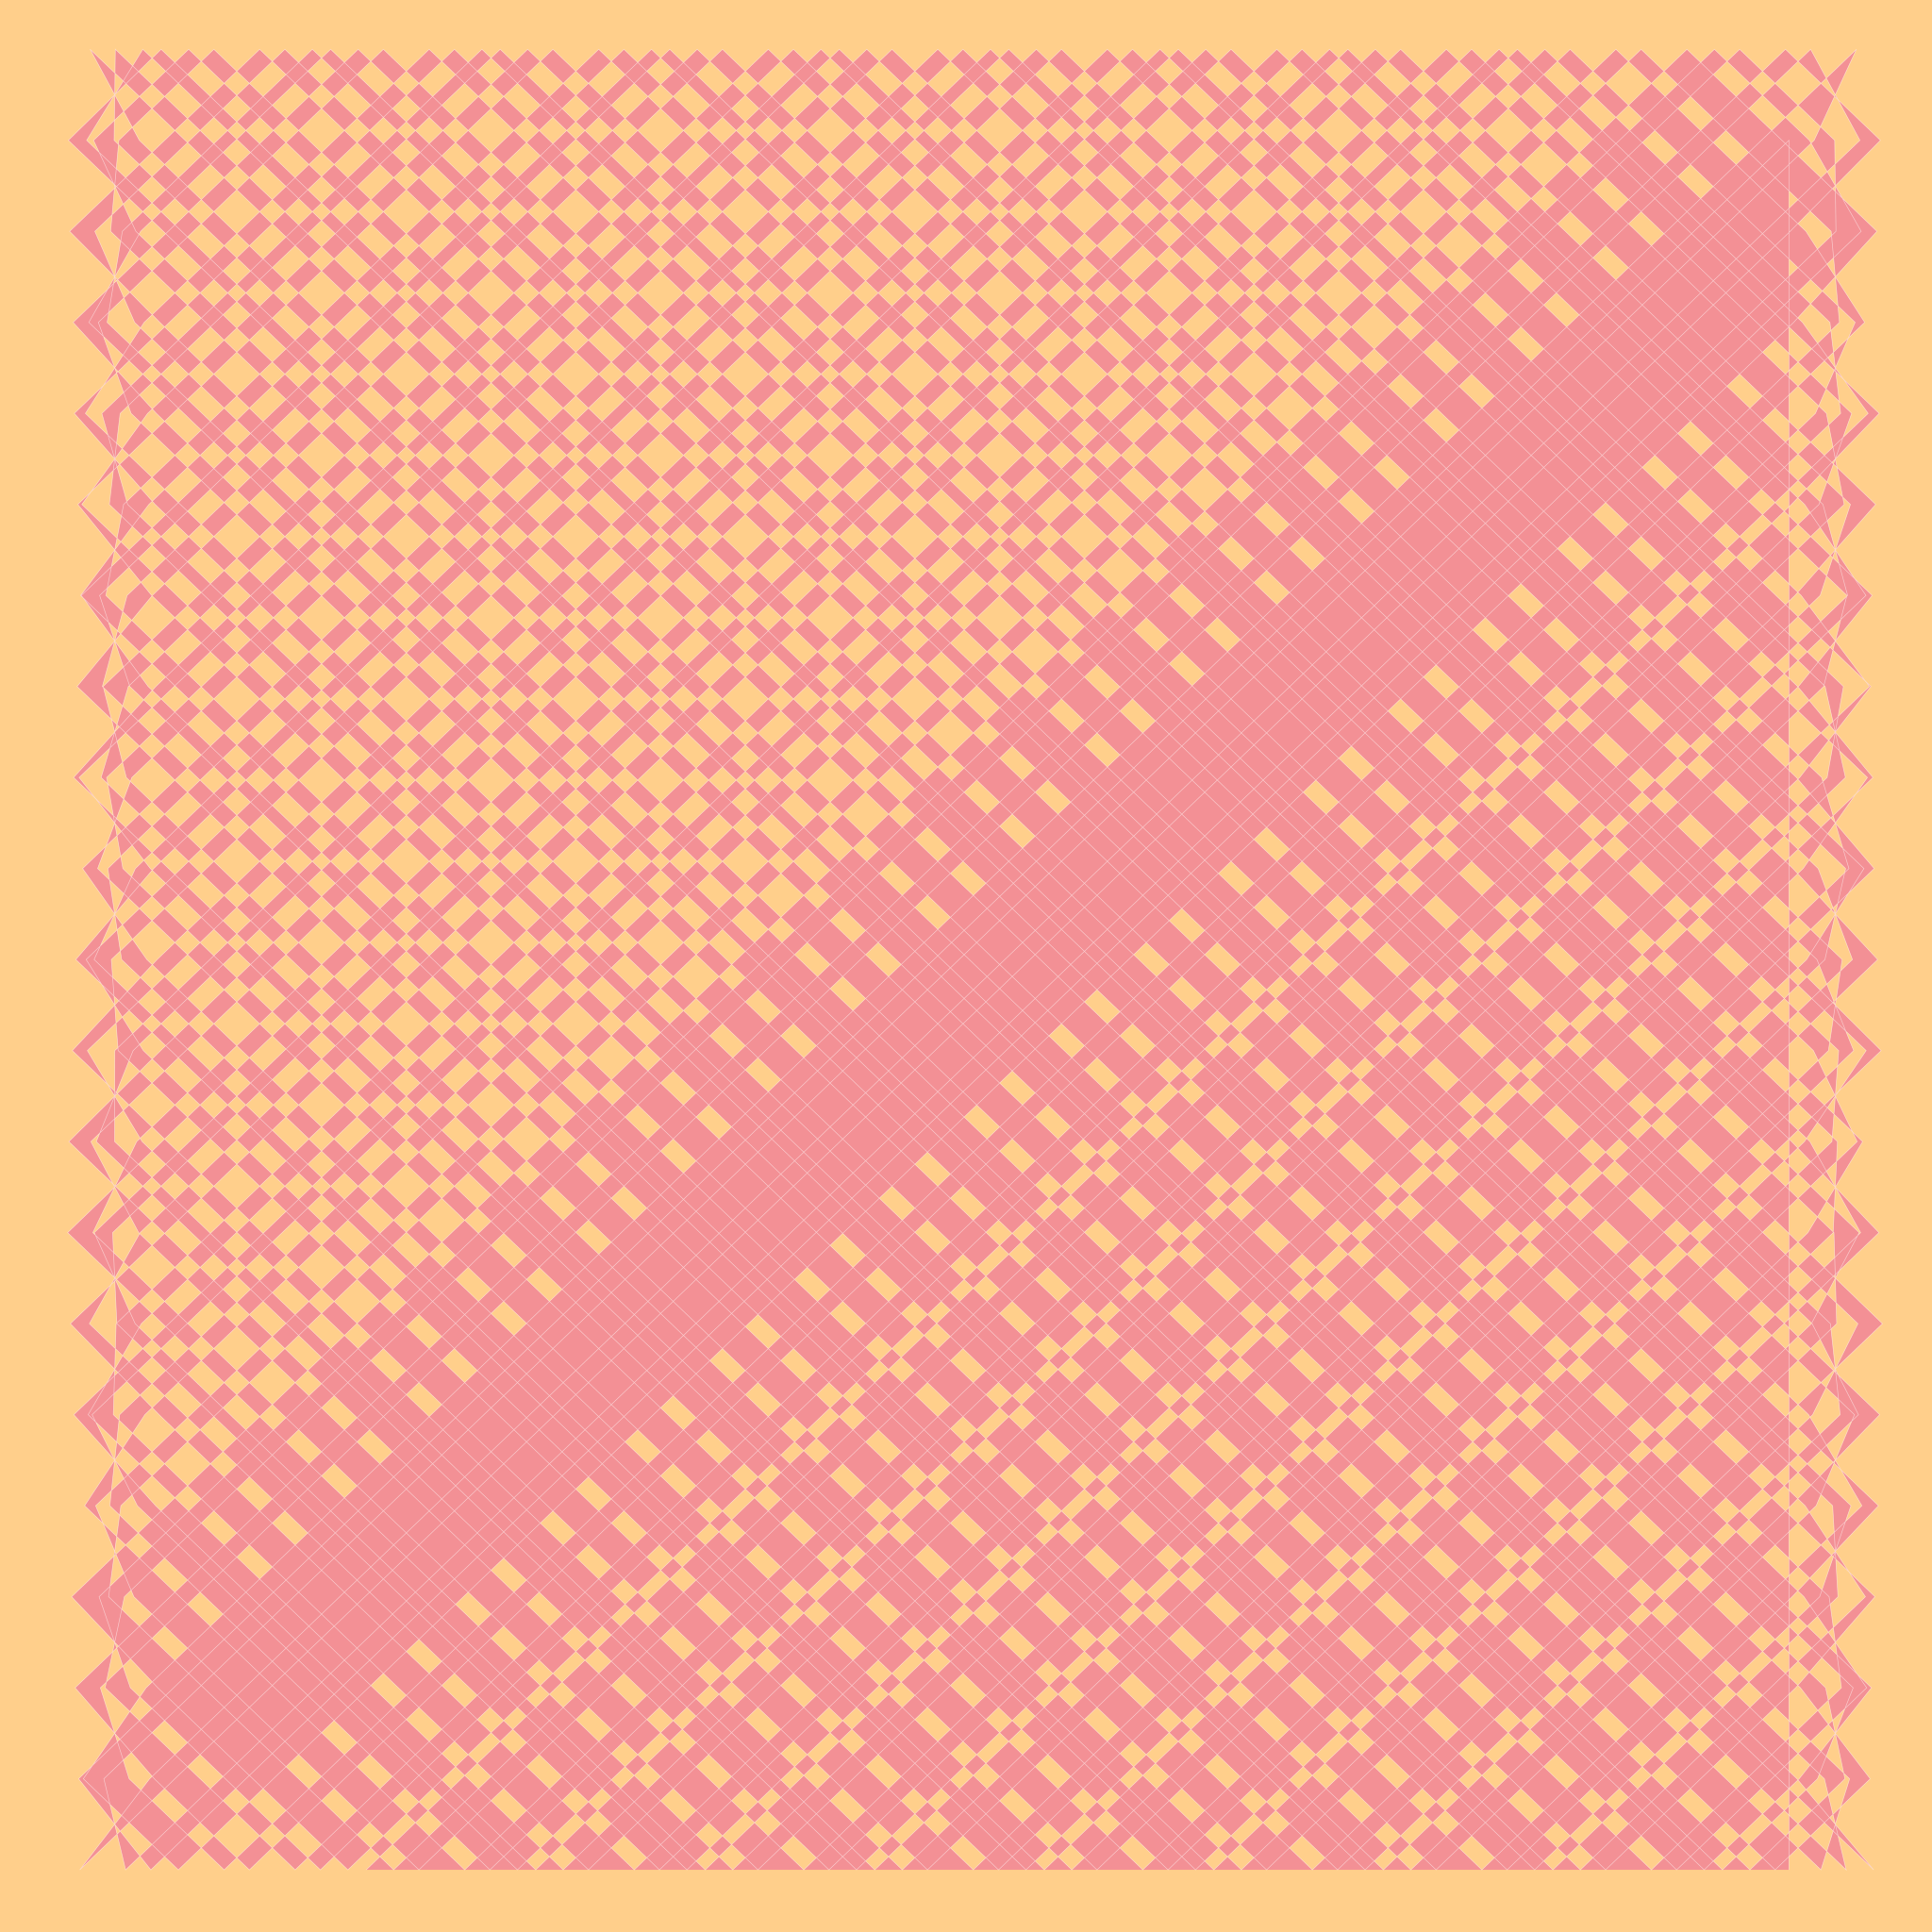

In [ ]:
from IPython.display import SVG
# Path to the SVG file
svg_path = "_assets/linen-20240627163546-float-48000.svg"

# Read the SVG file
with open(svg_path, 'r') as f:
    svg_content = f.read()

# Modify the line width in the SVG content
modified_svg_content = svg_content.replace('stroke-width:1', 'stroke-width:5')
modified_svg_content = modified_svg_content.replace('fill:#fff', 'fill:#E853A0')
modified_svg_content = modified_svg_content.replace('stroke:#fff', 'stroke:#E853A0')
modified_svg_content = modified_svg_content.replace('stroke-opacity:.8', 'stroke-opacity:.5')
modified_svg_content = modified_svg_content.replace('fill-opacity:.1', 'fill-opacity:0.5')


# Display the modified SVG
SVG(modified_svg_content)

In [68]:
import sounddevice as sd

# Set the sample rate and duration
sample_rate = 48000  # Sample rate in Hz
duration = 1.0  # Duration in seconds

# Record audio from the microphone
samples = sd.rec(int(sample_rate * duration), samplerate=sample_rate, channels=2, device=0)

# Wait for the recording to complete
sd.wait()

name = f"test-{datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}"

# write to file
sf.write(f"{name}_{sample_rate}.wav", samples, sample_rate)

import datetime

chart = makeChart(samples, numsamples=8000)
renderChart(chart, name)

0.21848461031913757 0.7836637198925018
